 https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

https://github.com/huseinzol05/Stock-Prediction-Models

https://www.quantopian.com/docs/data-reference/morningstar_fundamentals

https://www.quantopian.com/tutorials/getting-started#lesson2

https://www.quantopian.com/posts/i-think-i-just-built-my-first-2-dot-0-plus-sharpe-contest-strategy-tearsheet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !cd /gdrive/My\ Drive/{location you want to move}

from google.colab import files
files.upload()
# choose the file on your computer to upload it

#can download with files.download
files.download('data.dat')
#Downloading your model is the same:
files.download('my_model.ckpt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#change dir to your project folder
%cd /content/drive/My Drive/Colab Notebooks/finance/  

# Use pandas-datareader

1.stock

In [1]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
# https://pydata.github.io/pandas-datareader/remote_data.html

#!pip3 install pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# collect data for Amazon from 2018-11-6 to 2019-11-6
start = '2006-1-1'
end = '2021-1-1'
symbol='GOOG'
df = web.DataReader(name=symbol, data_source='yahoo', start=start, end=end)
#print(df.tail())
print(df.columns)

# select only close column
close = df[['Close']]
# rename the column with symbole name
close = close.rename(columns={'close': symbol})


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


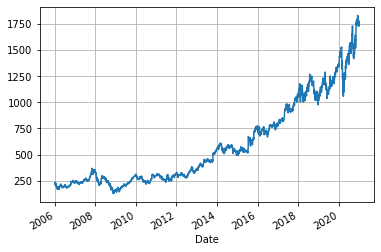

In [2]:
df.Close.plot()
plt.grid()
plt.show()

In [3]:
df.to_csv ('../dataset/GOOG.csv', index = True, header=True)

#2. world bank

In [ ]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2018)

#dataset is formatted DataFrame with a hierarchical index, apply groupby transformations to it
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()


country
Canada           48672.247614
Mexico            9706.874218
United States    50385.780209
Name: NY.GDP.PCAP.KD, dtype: float64

In [ ]:
#search keywords 'internet' in the WB database
wb.search('internet.*%').iloc[:,:2]

#compare GDP to percentage of people with internet access around the world
ind = ['NY.GDP.PCAP.KD', 'IT.NET.USER.ZS']
dat = wb.download(indicator=ind, country='all', start=2014, end=2014).dropna()
dat.columns = ['gdp', 'internet']
print(dat)

                                              gdp   internet
country                        year                         
Arab World                     2014   6354.798378  36.623849
Caribbean small states         2014   9139.168563  48.333692
Central Europe and the Baltics 2014  13773.191672  66.483393
Early-demographic dividend     2014   3296.247746  25.449076
East Asia & Pacific            2014   8922.372958  46.838477
...                                           ...        ...
Virgin Islands (U.S.)          2014  29303.724102  50.070000
West Bank and Gaza             2014   2603.521014  53.670000
Yemen, Rep.                    2014   1119.147493  22.550000
Zambia                         2014   1644.106790  19.000000
Zimbabwe                       2014   1232.864865  16.364740

[238 rows x 2 columns]


                            OLS Regression Results                            
Dep. Variable:               internet   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1181.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           7.99e-94
Time:                        16:39:27   Log-Likelihood:                -910.08
No. Observations:                 238   AIC:                             1824.
Df Residuals:                     236   BIC:                             1831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -107.8302      4.478    -24.080      

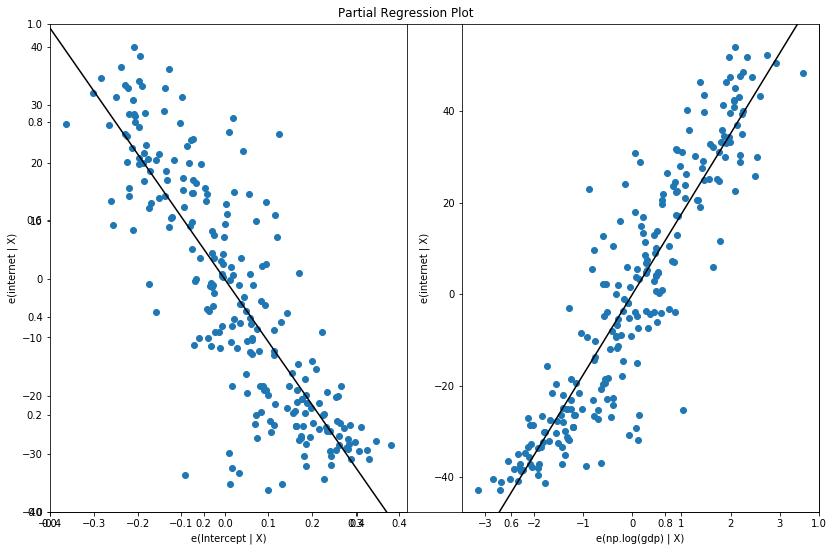

In [ ]:
# statsmodels: to assess the relationship between variables using regression.  
# populations in rich countries tend to use cellphones at a higher rate:
# https://www.statsmodels.org/dev/example_formulas.html
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.ols('internet ~ np.log(gdp)', dat).fit()
print(mod.summary())

# https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html
# ploting
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(mod, fig=fig)
#fig = sm.graphics.plot_partregress("internet", "np.log(gdp)", [""],  ax=ax, data=dat)
#fig = sm.graphics.plot_ccpr_grid(mod, fig=fig)


# Use yfinance

In [ ]:
# https://pypi.org/project/yfinance/
# https://www.quora.com/Stock-Market-Which-Python-libraries-can-I-use-to-access-stock-market-data-in-real-time
 !pip3 install yfinance

[*********************100%***********************]  1 of 1 completed


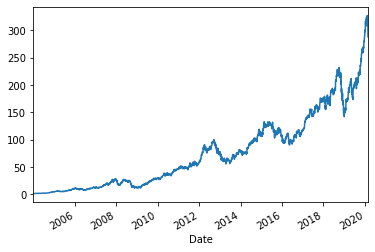

In [ ]:
# Import the plotting library
import matplotlib.pyplot as plt
 
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf  
 
# Get the data of the stock AAPL
data = yf.download('AAPL','2004-01-01','2020-02-26')

# Plot the close price of the AAPL
data.Close.plot()
plt.show()
# print(data.columns)


Save/read data file

In [ ]:
import pandas as pd
data.to_csv ('Apple.csv', index = False, header=True)
# applestock = pd.read_csv('Apple.csv') 

Download to local file

In [ ]:
!ls #list files
#save data locally with files.download
from google.colab import files
files.download('Apple.csv')

 Apple.csv  'finance 0.1 stock data.ipynb'  'finance 0.2 visulization.ipynb'


Getting minutes price

[*********************100%***********************]  1 of 1 completed


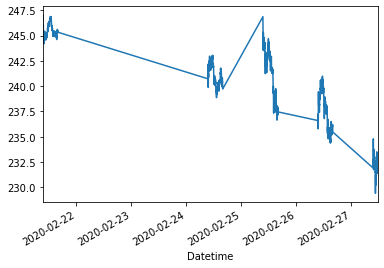

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
import yfinance as yf
data = yf.download(tickers="HD",
 period="5d",
 interval="1m")
data.tail()
data.Close.plot()
plt.show()
print(data.columns)

# Use quandl

In [ ]:
# https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

#!pip3 install quandl
import pandas as pd
import quandl
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
apple.tail()

Populating the interactive namespace from numpy and matplotlib


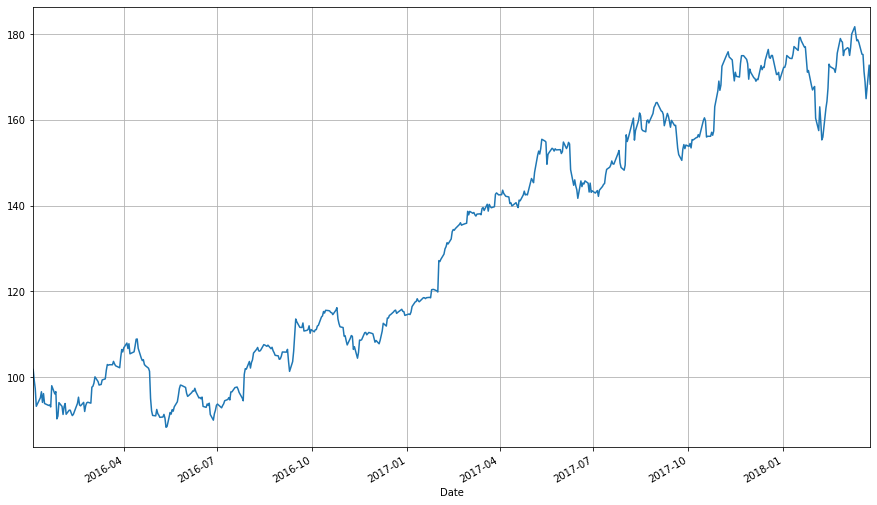

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL